#### Importing Libraries and Loading Data for Sentiment Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("vaccination_tweets.csv")
print(data.head())


                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

#### Checking for Missing Values in the Dataset








In [2]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     507
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

#### Dropping Missing Values and Displaying Statistical Summary of the Dataset

In [3]:
data = data.dropna()
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


#### Cleaning and Preprocessing Text Data with NLTK

In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\['
<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:16: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kkrab\AppData\Local\Temp\ipykernel_512\1372381321.py:11: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\kkrab\AppData\Local\Temp\ipykernel_512\1372381321.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\kkrab\AppData\Local\Temp\ipykernel_512\1372381321.py:16: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kkrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Generating and Displaying a Word Cloud from Text Data

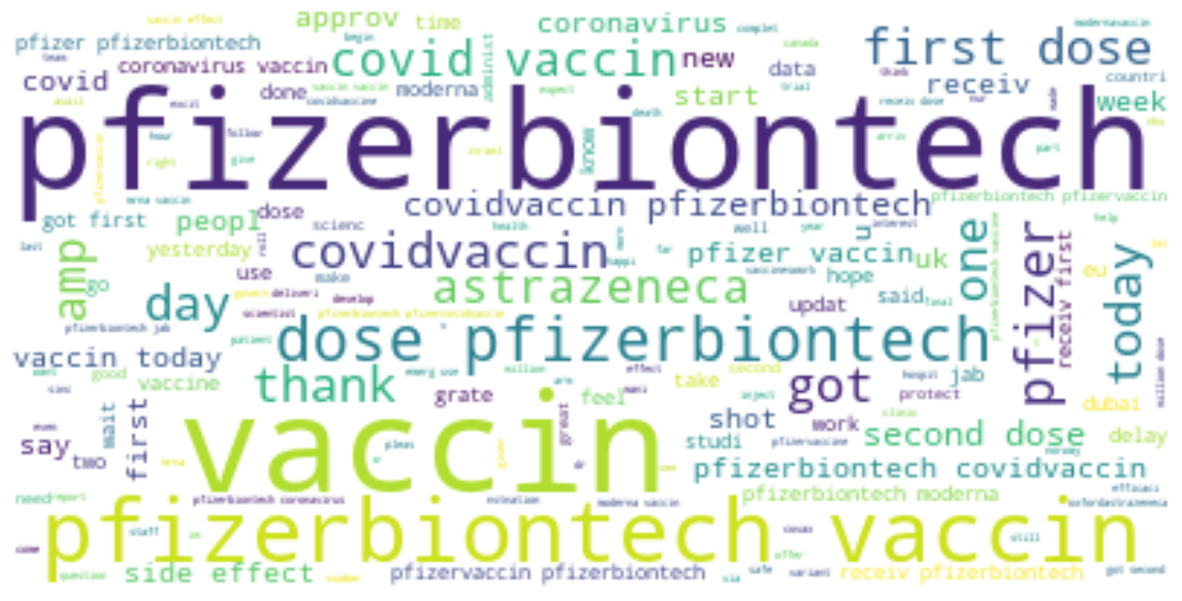

In [5]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Creating and Visualizing a Word Cloud from Hashtags

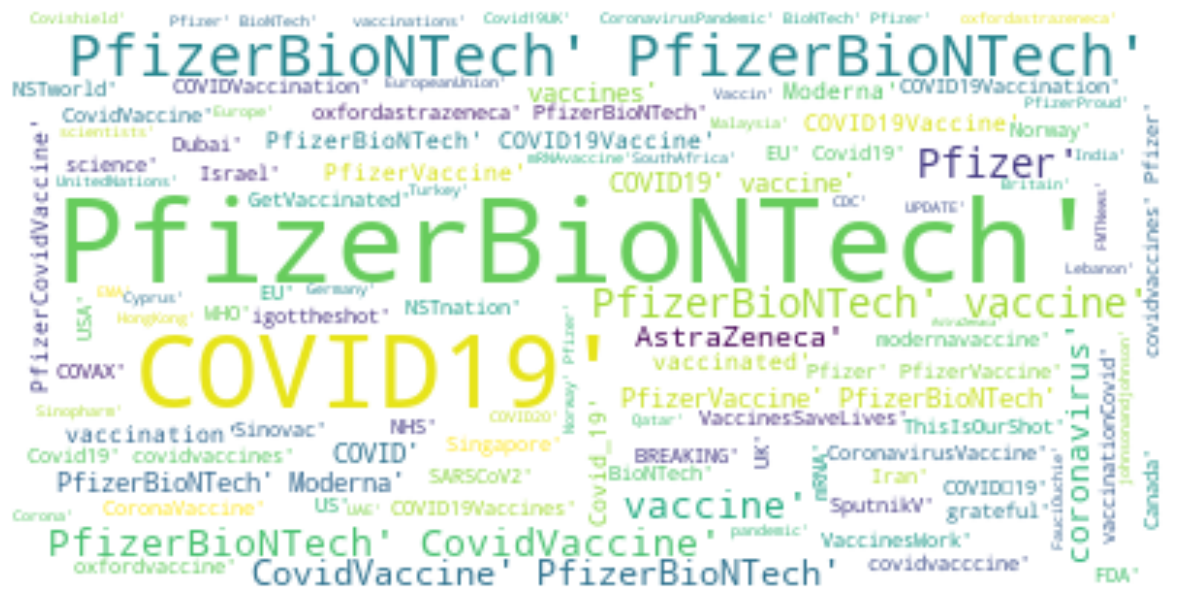

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

vtext = " ".join(str(i) for i in data.hashtags if not isinstance(i, float))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(vtext)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [7]:
data["user_verified"].value_counts()

user_verified
False    4169
True      580
Name: count, dtype: int64

#### Counting Instances of Verified and Non-Verified Users

In [8]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kkrab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 text  Positive  Negative  \
0   folk said daikon past could treat cytokin stor...     0.252     0.000   
2   coronavirus sputnikv astrazeneca pfizerbiontec...     0.000     0.000   
6   bit sad claim fame success vaccin patriot comp...     0.353     0.166   
9   covidvaccin state start get  monday us say pak...     0.000     0.000   
10  death close  mark million peopl wait pfizerbio...     0.000     0.302   

    Neutral  
0     0.748  
2     1.000  
6     0.481  
9     1.000  
10    0.698  


#### Calculating and Categorizing Overall Sentiment Score

In [9]:
def sentiment_score(a, b, c):
    if (a > b) and (a > c):
        return "Positive 😊 "
    elif (b > a) and (b > c):
        return "Negative 😠 "
    else:
        return "Neutral 🙂 "

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

result = sentiment_score(x, y, z)
print(result)


Neutral 🙂 


#### Displaying Counts of Positive, Negative, and Neutral Sentiments

In [10]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  417.816
Negative:  188.812
Neutral:  4142.375
